**price:** Price in dollars. Data collected in 2008
<br></br>
**carat:** Diamond weight. 1 carat = 0.2 grams
<br></br>
**cut:** Quality of diamond cut, affects its shine. Grades go from (low) Fair, Good, Very Good, Premium, Ideal (best).
<br></br>
**color:** Measure of diamond coloration. Increasing grades go from (some color) J, I, H, G, F, E, D (colorless).
<br></br>
**clarity:** Measure of diamond inclusions شوائب . Increasing grades go from (inclusions) I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF (internally flawless). لاتشوبه شائبة داخلياً
<br></br>
**x, y, z:** Diamond length, width, and depth, respectively, in mm.
<br></br>
**table:** Ratio of width of top face of diamond to its overall width, is a percentage.
<br></br>
**depth:** Proportional depth of diamond, as a percentage. This is computed as 2*z/(x+y), or the ratio of the depth to the average of length and width.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
diamonds = pd.read_csv('diamonds.csv')

## Dataset Overview

Before running straight into the exploration, let's just take a moment to get a high-level overview of the dataset. We can refer back to these points if we need to get our bearings on what we should expect to see from each variable.

In [3]:
# high-level overview of data shape and composition
print(diamonds.shape)
print(diamonds.dtypes)
diamonds.head(10)

(53940, 10)
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [4]:
# descriptive statistics for numeric variables
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Univariate Exploration

Let's start our exploration by looking at the main variable of interest: price. Is the distribution skewed or symmetric? Is it unimodal or multimodal?

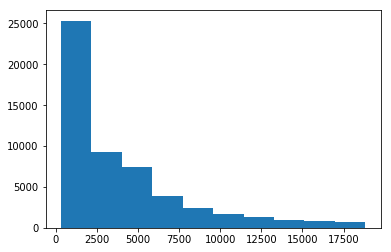

In [5]:
#diamonds.price.hist();
plt.hist(data = diamonds, x = 'price');
#xticks = ['2.5k', '5k', '7.5k', '10k', '12.5k', '15k', '17.5k']
#plt.xticks(xticks, xticks);

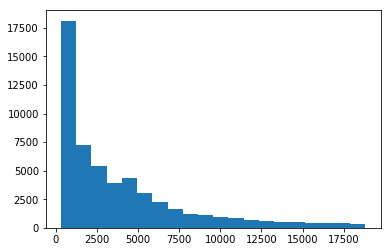

In [6]:
plt.hist(data = diamonds, x = 'price', bins = 20);

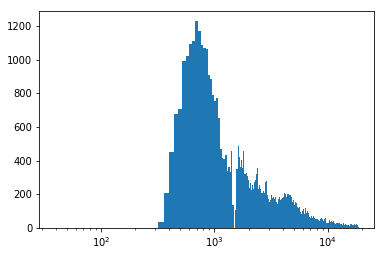

In [7]:
bins = np.arange(-1, diamonds['price'].max()+40, 40)
plt.hist(data = diamonds, x = 'price', bins = bins);
plt.xscale('log');

In [8]:
diamonds['price'].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

In [9]:
np.log10(diamonds['price'].describe())

count    4.731911
mean     3.594702
std      3.600912
min      2.513218
25%      2.977724
50%      3.380392
75%      3.726258
max      4.274689
Name: price, dtype: float64

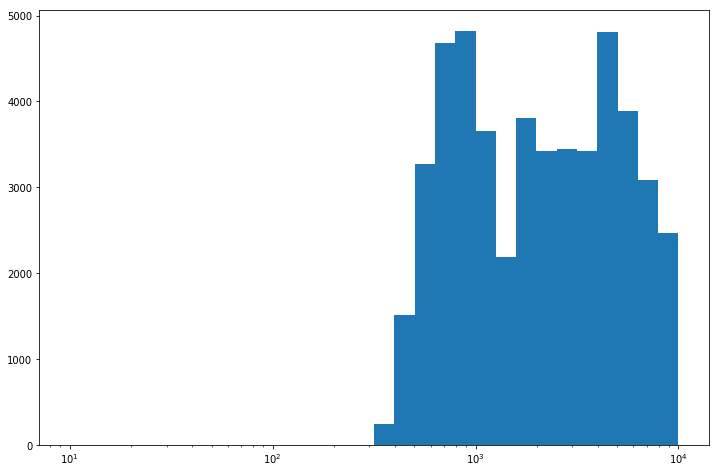

In [10]:
plt.figure(figsize = (12, 8))
bins = 10 ** np.arange(1, 4 + 0.1, 0.1)
plt.hist(data = diamonds, x = 'price', bins = bins);
plt.xscale('log');


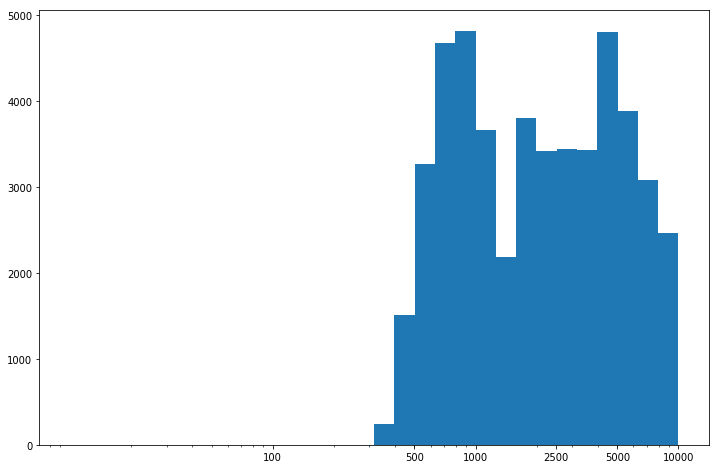

In [11]:
plt.figure(figsize = (12, 8))
bins = 10 ** np.arange(1, 4 + 0.1, 0.1)
ticks = [100, 500, 1000, 2500, 5000, 10000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = diamonds, x = 'price', bins = bins);
plt.xscale('log');
plt.xticks(ticks, labels);

Price distribution comment 1: <span style="color:black">You should create a histogram for price, since it is a numeric variable. Your initial plots should show that diamond price follows a highly skewed distribution. If you haven't tried a log scaling, then try that now.</span>

Price distribution comment 2: <span style="color:black">Under a log scale, you should see that the data is roughly bimodal, with one large peak somewhere between 500 and 1000, and a second large peak between 4 and 5 thousand. The price distribution also seems to just cut off at its maximum, rather than declining in a smooth tail.</span>

Next, create a plot of our first diamond 'C' metric: carat weight. Is there an interesting pattern in these values?

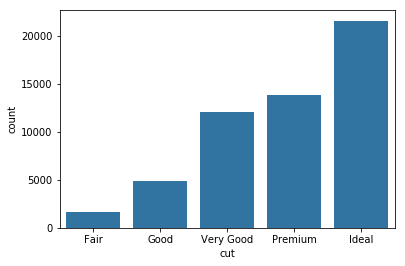

In [12]:
# univariate plot of diamond cut, Grades go from (low) Fair, Good, Very Good, Premium, Ideal (best).

# Order the cut
cut_quality = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
cuts = pd.api.types.CategoricalDtype(ordered = True, categories = cut_quality)
diamonds['cut'] = diamonds['cut'].astype(cuts);

# Plot by order
base_color = sb.color_palette()[0]
sb.countplot(data = diamonds, x = 'cut', color = base_color);

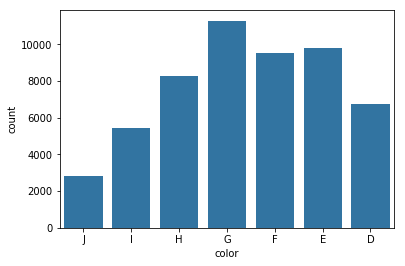

In [13]:
# univariate plot of diamond color, Increasing grades go from (some color) J, I, H, G, F, E, D (colorless).

# Order the colors
color_quality = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
colors = pd.api.types.CategoricalDtype(ordered = True, categories = color_quality)
diamonds['color'] = diamonds['color'].astype(colors);

# Plot by order
base_color = sb.color_palette()[0]
sb.countplot(data = diamonds, x = 'color', color = base_color);

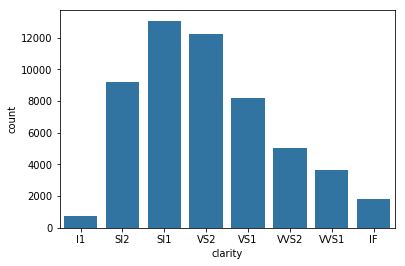

In [14]:
# univariate plot of diamond clarity, 
# Increasing grades go from (inclusions) I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF (internally flawless).

# Order the clarity
clarity_quality = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
clarities = pd.api.types.CategoricalDtype(ordered = True, categories = clarity_quality)
diamonds['clarity'] = diamonds['clarity'].astype(clarities);

# Plot by order

base_color = sb.color_palette()[0]
sb.countplot(data = diamonds, x = 'clarity', color = base_color);

In [15]:
diamonds.clarity.value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

General categorical feature comment: <span style="color:black">Since these features are categorical, you should be producing bar charts here. In addition, since they're ordinal in nature, the bars should be sorted in order of increasing quality level. Check the previous page if you need documentation on how the scales are set up, since they're not completely intuitive!</span>

Cut distribution comment: <span style="color:black">The bar chart should show that the mode cut quality for diamonds in this dataset is the highest grade, Ideal. There is a consistent decrease in number of diamonds of lower cut grades.</span>

Color distribution comment: <span style="color:black">The distribution is roughly unimodal, with the most common color grade in this dataset belonging to the central grade represented, G. (There are other diamond grades that are worse than J, but they're not part of the collected data.)</span>

Clarity distribution comment: <span style="color:black">There is a right-skew in the clarity grades represented in the dataset, with most of the diamonds collected having slight or very slight inclusions (SI2, SI1, VS2, VS1). There are very few diamonds with visible inclusions (I1).</span>

## Bivariate Exploration

In the previous notebook, you looked at the univariate distribution of five features in the diamonds dataset: price, carat, cut, color, and clarity. Now, we'll investigate relationships between pairs of these variables, particularly how each of them relate to diamond price.

To start, construct a plot of the price against carat weight. What kind of shape does the relationship between these variables take?

In [16]:
# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {'cut': ['Fair','Good','Very Good','Premium','Ideal'],
                    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}

for var in ordinal_var_dict:
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
        diamonds[var] = diamonds[var].astype(ordered_var)
    else: # pre-v0.21
        diamonds[var] = diamonds[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])

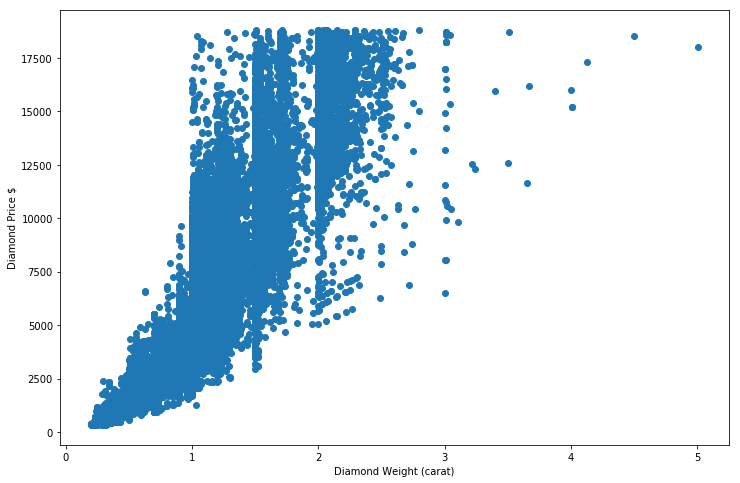

In [17]:
plt.figure(figsize = (12, 8))
plt.scatter(data = diamonds, x = 'carat', y = 'price');
plt.xlabel('Diamond Weight (carat)')
plt.ylabel('Diamond Price $');

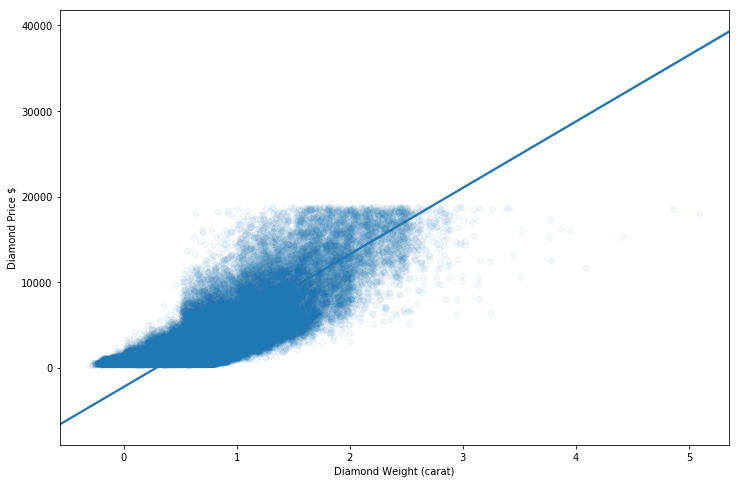

In [18]:
plt.figure(figsize = (12, 8))
sb.regplot(data = diamonds, x = 'carat', y = 'price', x_jitter = 0.5,
           scatter_kws = {'alpha' : 1/20});
plt.xlabel('Diamond Weight (carat)')
plt.ylabel('Diamond Price $');

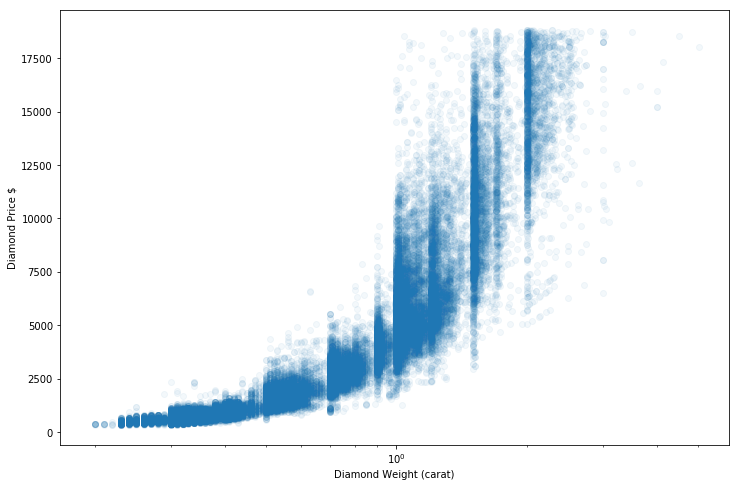

In [35]:
plt.figure(figsize = (12, 8))
plt.scatter(data = diamonds, x = 'carat', y = 'price',
            alpha = 1/20);
plt.xscale('log');
plt.xlabel('Diamond Weight (carat)')
plt.ylabel('Diamond Price $');

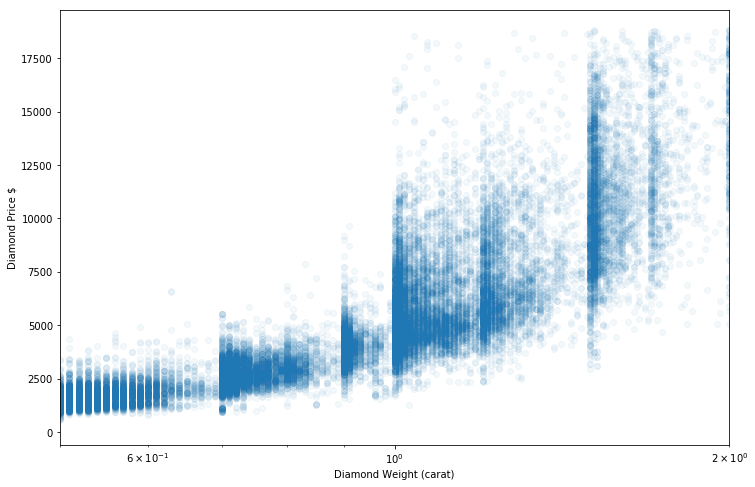

In [34]:
plt.figure(figsize = (12, 8))
plt.scatter(data = diamonds, x = 'carat', y = 'price',
            alpha = 1/20);
plt.xscale('log');
plt.xlabel('Diamond Weight (carat)')
plt.ylabel('Diamond Price $');
plt.xlim(2 ** -1, 2 ** 1);

In [20]:
diamonds['carat'].describe()

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

In [21]:
np.log10(diamonds['carat'].describe())

count    4.731911
mean    -0.098030
std     -0.324211
min     -0.698970
25%     -0.397940
50%     -0.154902
75%      0.017033
max      0.699838
Name: carat, dtype: float64

**Price vs. Carat Comment 1**: <span style="color:black">Since these are both numeric variables, a scatterplot is a natural choice. You might also consider a heat map for this task. In either case, you should recall that the price distribution suggests a logarithmic transformation due to its very long tail. If you haven't tried it yet, add a transformation to the price axis.</span>
<br></br><div style="text-align: right">
**السعر مقابل القيراط التعليق 1 :** حيث أن هذين كليهما متغيرات عددية، التخطيط النقطي خيار طبيعي. أنت أيضاً قد تأخذ بالاعتبار الخريطة الحرارية لهذه المهمة. في هذه الحالة، أنت يجب أن تتذكر أن توزيع السعر يقترح تحويل لوغاريتمي بسبب الذيل الطويل جداً. إذا لم تكن جربتها للآن، أضف التحويل لمحور السعر.
</div>

**Price vs. Carat Comment 2:** <span style="color:black">Assuming that you put price on the y-axis and carat on the x-axis, the transformation should have changed the scatterplot from looking concave upwards (like an upwards-pointing bowl) to concave downards (like a downwards-pointing bowl). It would be nice to have a linear trend, wouldn't it? It turns out that the x, y, and z dimensions track a much more linear trend against price than carat does. Since carat is more recognizable a feature value, let's add a transformation to the x-axis to see the approximately linear trend. Since weight is proportional to volume, and since all the diamonds are cut in approximately the same way (round-cut), a cube-root transformation of carat should allow us to see an approximately linear trend.</span>
<br></br><div style="text-align: right">
   **السعر مقابل القيراط التعليق 2 :**  بافتراض أنك وضعت السعر على محور الصادات والقيراط على محور السينات ، التحويل يجب أن يقوم بتغيير التخطيط النقطي من أن يشبه التقعر للأعلى للتقعر للأسفل. سيكون لطيفاً إن يكون لدينا ترند خطي، أليس كذلك؟ هذا يتبين أن الأبعاد x, y, z تتتبع ترند خطي أكثر بكثير ضد السعر أكثر من القيراط. حيث أن القيراط ملاحظ أكثر أنه قيمة مميزة ، دعنا نضيف تحويل للمحور السيني لرؤية الترند الخطي التقريبي. حيث أن الوزن هو نسبي للكمية، وحيث أن كل الألماسات تم قطعها بنفس الطريقة تقريباً (قطع-تقريبي) الجذر-المكعب للتحويل للقيراط يجب أن يسمح لنا في رؤية ترند خطي تقريبي. </div> 

Price vs. Carat comment 3: <span style="color:black">One thing that you might notice in the visualization after transformation is that the trend between price and carat weight is 'cut off' by the maximum price limit of diamonds available in the dataset. For diamonds above about 1.5 carats, we'd probably expect some diamonds about $20,000 in price, given the trend below 1.5 carats. This would be a point to potentially pay attention to later on with interaction effects between other factors, and when building a model of diamond prices.</span>
<br></br><div style="text-align: right">
**السعر مقابل القيراط التعليق 3 :** شيء واحد قد تكون لاحظته في الرسم البياني بعد التحويل  أن الترند بين السعر والقيراط تم اقتصاصه بواسطة الحد للسعر الأعلى للألماسات المتوفر في مجموعة البيانات. للألماسات تقريباً أعلى من 1.2 قيراط ، نحن ربما نتوقع بعض الألماسات حوالي 20000 دولار كسعر، بإعطاء الترند أقل من 1.5 قيراط. هذا سيكون نقطة احتمالية لأخذ الانتباه اللاحق مع تأثيرات التفاعل بين المفاعلات الأخرى، وعند بناء موديل أسعار الألماس. </div> 

Now let's take a look at the relationship between price and the three categorical quality features, cut, color, and clarity. Are there any surprising trends to be seen here?

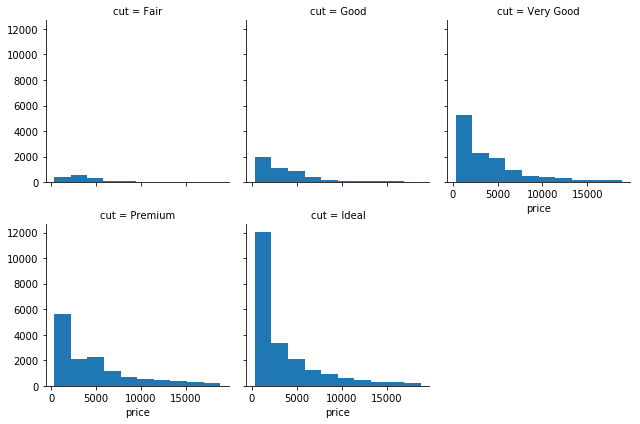

In [22]:
g = sb.FacetGrid(data = diamonds, col = 'cut', col_wrap = 3);
g.map(plt.hist, 'price');

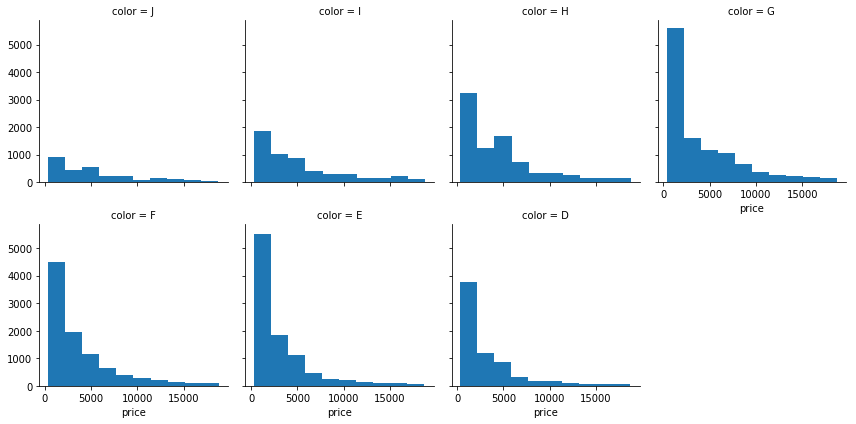

In [23]:
g = sb.FacetGrid(data = diamonds, col = 'color', col_wrap = 4);
g.map(plt.hist, 'price');

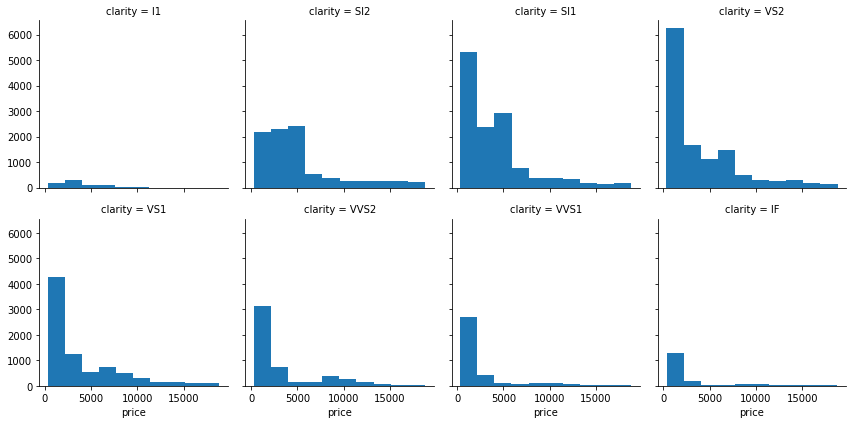

In [24]:
g = sb.FacetGrid(data = diamonds, col = 'clarity', col_wrap = 4);
g.map(plt.hist, 'price');

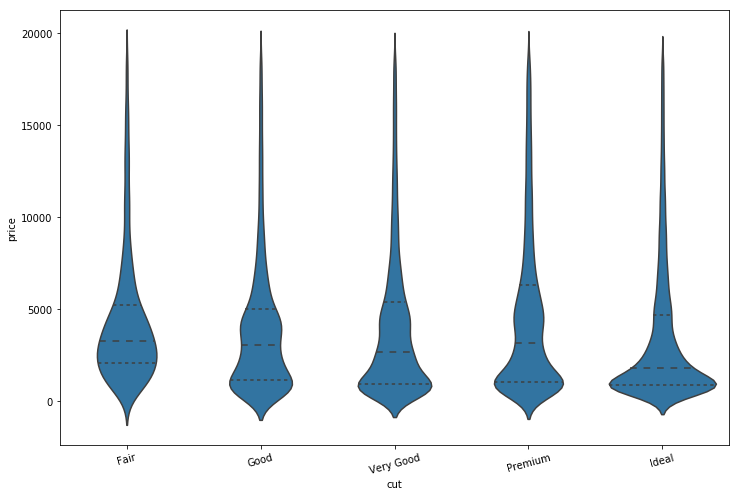

In [25]:
plt.figure(figsize = (12, 8))
base_color = sb.color_palette()[0]
sb.violinplot(data = diamonds, x = 'cut', y = 'price',
              color = base_color, inner = 'quartile');
plt.xticks(rotation = 15);

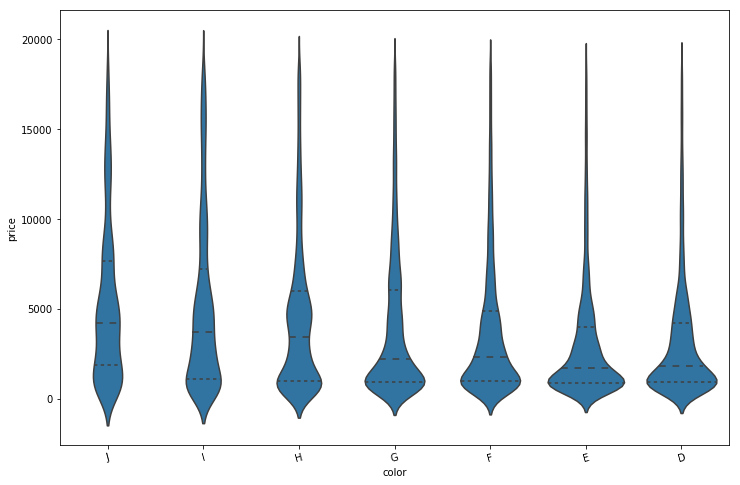

In [26]:
plt.figure(figsize = (12, 8))
base_color = sb.color_palette()[0]
sb.violinplot(data = diamonds, x = 'color', y = 'price',
              color = base_color, inner = 'quartile');
plt.xticks(rotation = 15);

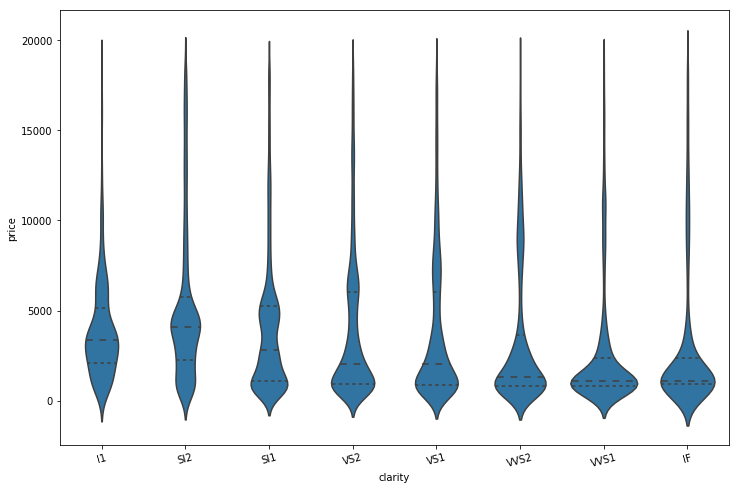

In [27]:
plt.figure(figsize = (12, 8))
base_color = sb.color_palette()[0]
sb.violinplot(data = diamonds, x = 'clarity', y = 'price',
              color = base_color, inner = 'quartile');
plt.xticks(rotation = 15);

**Price vs. Categorical Comment 1:** <span style="color:black">There's a lot of different approaches you could have taken here. If you created a box plot, then you probably noticed something interesting and unintuitive: the median price of diamonds should tend to look like it _decrease_ with _increasing_ gem quality. Shouldn't we expect this to be the other way around? This deserves a deeper look. Is there a different plot type to choose that shows more details in the data?</span>

**Price vs. Categorical Comment 2:** <span style="color:black">With a violin plot, you can get more insight into what causes the trend in median prices to appear as it does. Faceted histograms will also produce a similar result, though unless the faceting keeps the price axis common across facets, the trend will be harder to see. For each ordinal variable, there are multiple modes into which prices appear to fall. Going across increasing quality levels, you should see that the modes rise in price - this should be the expected effect of quality. However, you should also see that more of the data will be located in the lower-priced modes - this explains the unintuitive result noted in the previous comment. This is clearest in the clarity variable. Let's keep searching the data to see if there's more we can say about this pattern.</span>

Before we complete the bivariate exploration, we should take a look at some of the relationships between the independent variables. Namely, how does carat weight change across the other three 'C' quality measures? You can take the same approach as the above investigation of price against the three categorical quality measures. What can you see in these plots, and how does this relate to your earlier investigations?

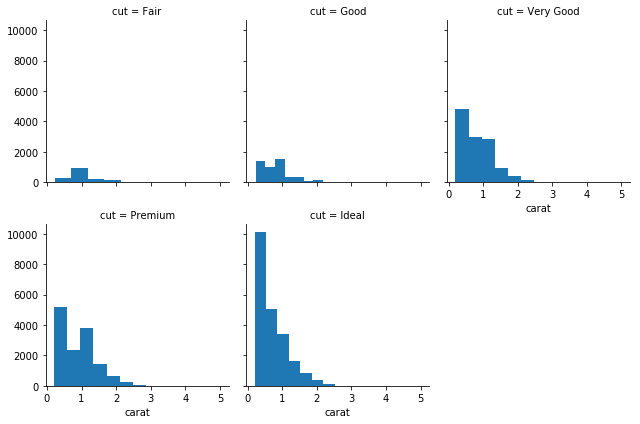

In [28]:
g = sb.FacetGrid(data = diamonds, col = 'cut', col_wrap = 3);
g.map(plt.hist, 'carat');

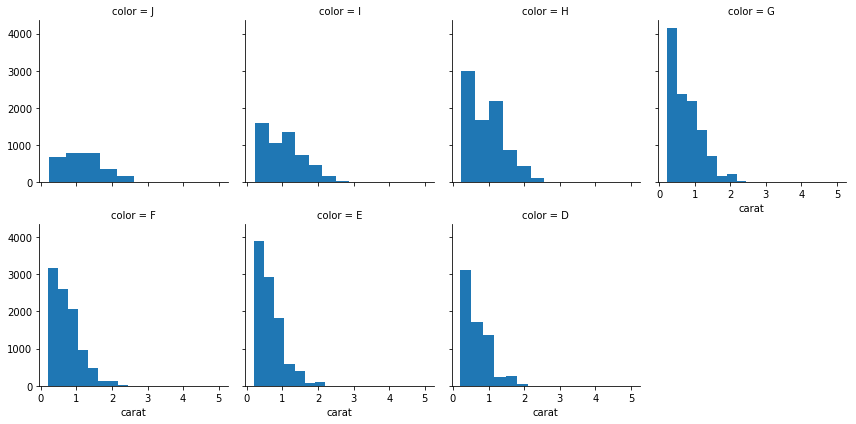

In [29]:
g = sb.FacetGrid(data = diamonds, col = 'color', col_wrap = 4);
g.map(plt.hist, 'carat');

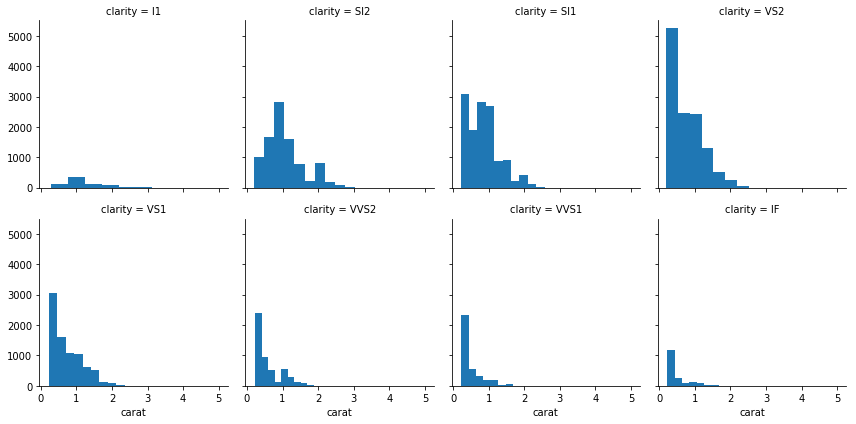

In [30]:
g = sb.FacetGrid(data = diamonds, col = 'clarity', col_wrap = 4);
g.map(plt.hist, 'carat');

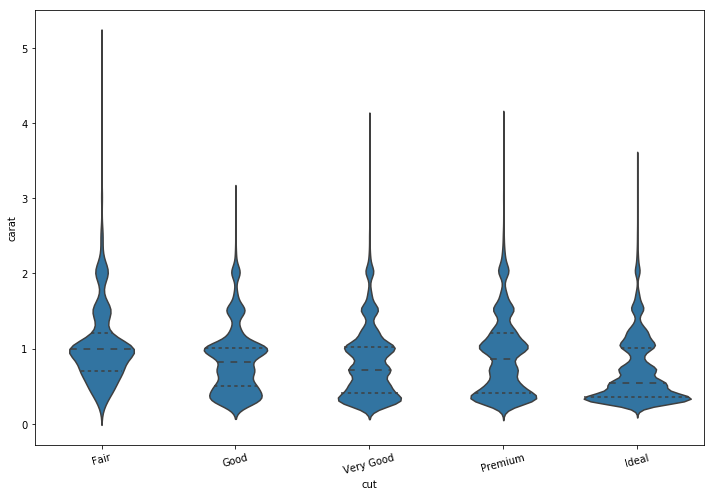

In [31]:
plt.figure(figsize = (12, 8))
base_color = sb.color_palette()[0]
sb.violinplot(data = diamonds, x = 'cut', y = 'carat',
              color = base_color, inner = 'quartile');
plt.xticks(rotation = 15);

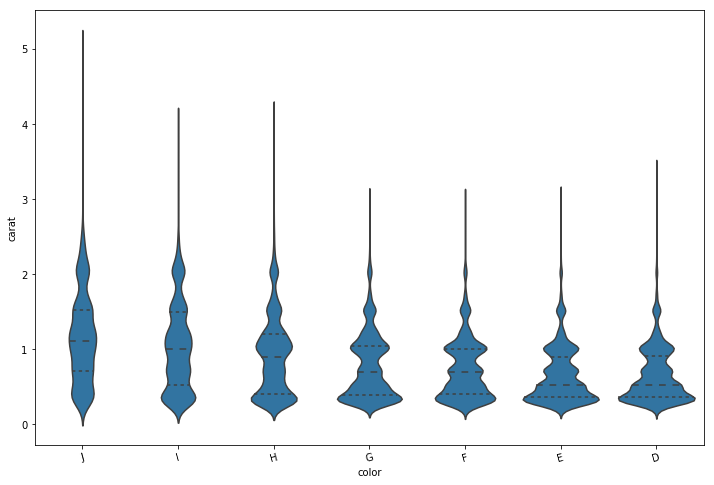

In [32]:
plt.figure(figsize = (12, 8))
base_color = sb.color_palette()[0]
sb.violinplot(data = diamonds, x = 'color', y = 'carat',
              color = base_color, inner = 'quartile');
plt.xticks(rotation = 15);

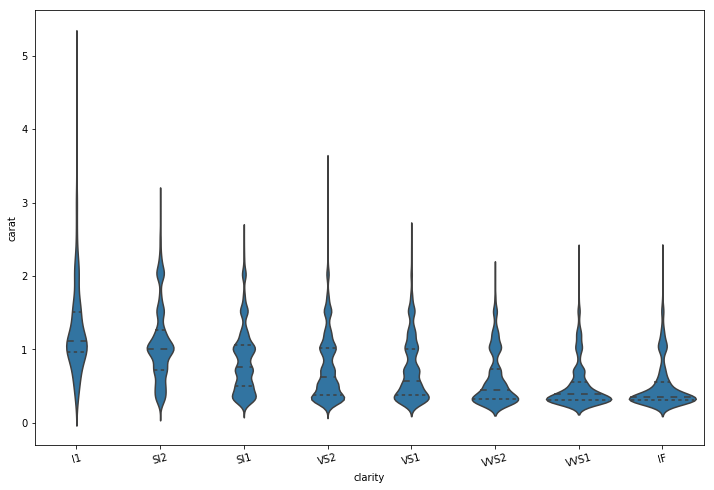

In [33]:
plt.figure(figsize = (12, 8))
base_color = sb.color_palette()[0]
sb.violinplot(data = diamonds, x = 'clarity', y = 'carat',
              color = base_color, inner = 'quartile');
plt.xticks(rotation = 15);

**Carat vs. Categorical Comment:** <span style="color:black">These plots should shed a lot more light into the patterns already seen. Larger diamonds are more likely to receive lower categorical quality grades, while high quality grades are more likely to have their numbers made up of smaller diamonds. Since carat weight appears to be a major driver of price, this helps to explain the surprising marginal effect of diamond quality against price. The challenge next will be on how to depict this in a multivariate plot.</span>
<br></br><div style="text-align: right">
**القيراط مقابل التصنيفية التعليق :** هذه التخطيطات يجب أن تسلط الكثير من الضوء على النمط الذي سبق أن رأيناه. **الألماسات الأكبر هي من المحتمل أن تستقبل أقل درجات جودة تصنيفية، بينما درجات الجودة التصنيفية العالية من المحتمل أكبر أن تكون صنعت أرقامها من الألماسات الأصغر** . حيث أن وزن القيراط يظهر أنه قائد أساسي للسعر ، هذا يساعد في شرح التأثير المفاجيء الهامشي لجودة الألماس ضد السعر. التحدي القادم سوف يكون على كيفية وصف هذا في التخطيط العديد المتغيرات. </div> 